In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path_S1 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_S2 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 2/'

NS1 = read_SMPS(path_S1, parent_path, [-1, 0])
OPS1 = read_OPS(path_S1+'OPS/', parent_path, -1)
MA1 = read_csv_BC(path_S1 + 'MA200/', parent_path, -1)
NS2 = read_SMPS(path_S2, parent_path, [-1, 0])
OPS2 = read_OPS(path_S2+'OPS/', parent_path, -1)
MA2 = read_csv_BC(path_S2 + 'MA200/', parent_path, -1)

NS_dict_keys = ['2024-12-09_NanoScan', '2024-12-10_NanoScan', '2024-12-11_NanoScan', '2024-12-12_NanoScan', 
                '2024-12-13_NanoScan', '2024-12-16_NanoScan', '2024-12-17_NanoScan']
NS_bins = NS1['2024-12-06_NanoScan'].keys()[3:16].to_list()

OPS1_dict_keys = ['OPS1-CPH-d1', 'OPS1-CPH-d2', 'OPS1-CPH-d3', 'OPS1-CPH-d4', 'OPS1-CPH-d5', 'OPS1-NP-d1', 'OPS1-NP-d2'] # 'OPS1-CPH-n3', 'OPS1-CPH-n4'
OPS2_dict_keys = ['OPS2-CPH-d1', 'OPS2-CPH-d2', 'OPS2-CPH-d3', 'OPS2-CPH-d4', 'OPS2-CPH-d5', 'OPS2-NP-d1', 'OPS2-NP-d2']
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_keys = OPS1['OPS1-HEPA'].keys()[1:17].to_list()

OPS1['OPS1-CPH-d5'] = pd.concat([OPS1['OPS1-CPH-d5-1'], OPS1['OPS1-CPH-d5-2']], ignore_index=True)
OPS1['OPS1-NP-d2'] = pd.concat([OPS1['OPS1-NP-d2-1'], OPS1['OPS1-NP-d2-2']], ignore_index=True)
OPS2['OPS2-CPH-d3'] = pd.concat([OPS2['OPS2-CPH-d3-1'], OPS2['OPS2-CPH-d3-2']], ignore_index=True)
OPS2['OPS2-CPH-d3'] = pd.concat([OPS2['OPS2-CPH-d3'], OPS2['OPS2-CPH-d3-3']], ignore_index=True)

MA1['MA200-0369_241217094901'] = pd.concat([MA1['MA200-0369_241217094901'], MA1['MA200-0369_241217101259']], ignore_index=True)

# NS1_bg_mean, NS1_bg_std, NS1_bg_error = bin_mean(['2024/10/21 11:45:00', '2024/10/21 14:10:00'], 
#                                               NS1['2024-10-21_NanoScan'], NS_bins, 'Time', 0.1)
# for key in NS_dict_keys:
#     df = NS1[key]
#     for i, bin in enumerate(NS_bins):
#         df[bin] = df[bin] - NS_bg_mean[i]
#     NS1[key] = df

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\read_data_functions.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key][df[key] < 0] = 0
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\read_data_functions.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key][df[key] < 0] = 0
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\read_data_functions.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [3]:
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]

OPS1_mass = {}
for key in OPS1_dict_keys:
    mass_conc = calc_mass_conc(OPS1[key], OPS_keys, OPS_mid_point, 1.2)
    OPS1_mass[key] = mass_conc

OPS2_mass = {}
for key in OPS2_dict_keys:
    mass_conc = calc_mass_conc(OPS2[key], OPS_keys, OPS_mid_point, 1.2)
    OPS2_mass[key] = mass_conc

In [3]:
timestamps_wBG = [['2024-12-09 12:00:00', '2024-12-09 16:30:00'],
                  ['2024-12-10 09:15:00', '2024-12-10 16:00:00'],
                  ['2024-12-11 09:00:00', '2024-12-11 16:00:00'],
                  ['2024-12-12 09:00:00', '2024-12-12 16:00:00'],
                  ['2024-12-13 08:45:00', '2024-12-13 14:00:00'],
                  ['2024-12-16 09:45:00', '2024-12-16 15:45:00'],
                  ['2024-12-17 09:15:00', '2024-12-17 15:45:00']]

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


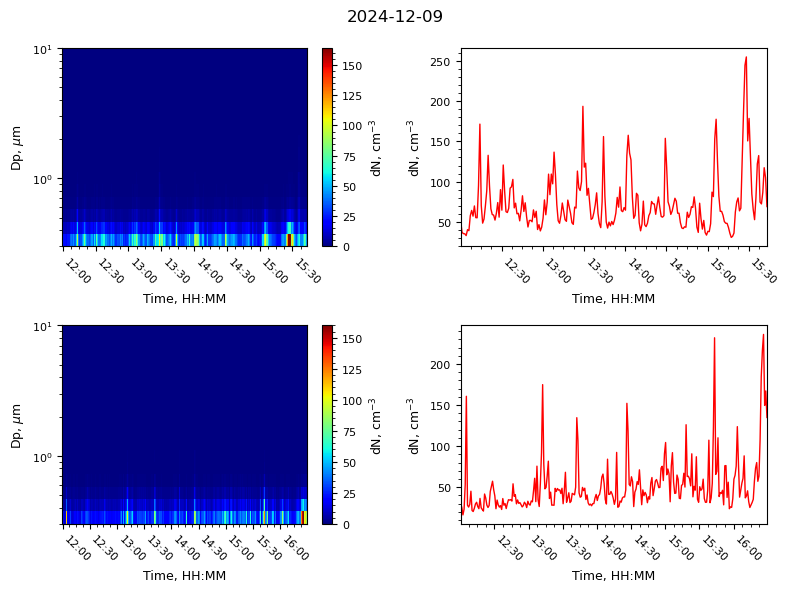

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


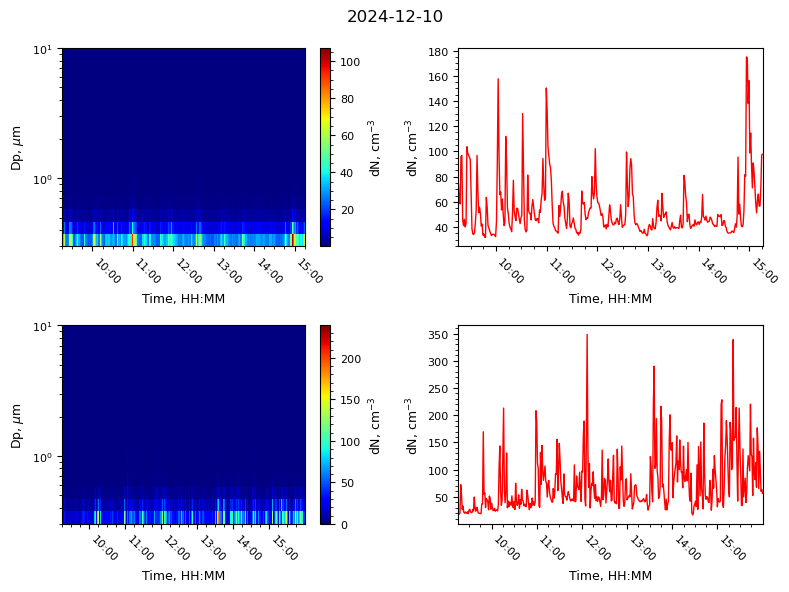

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


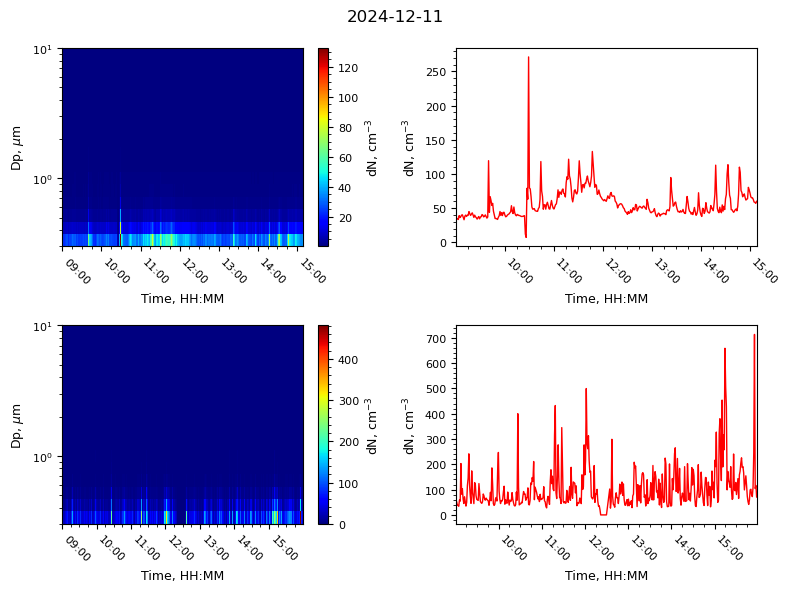

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


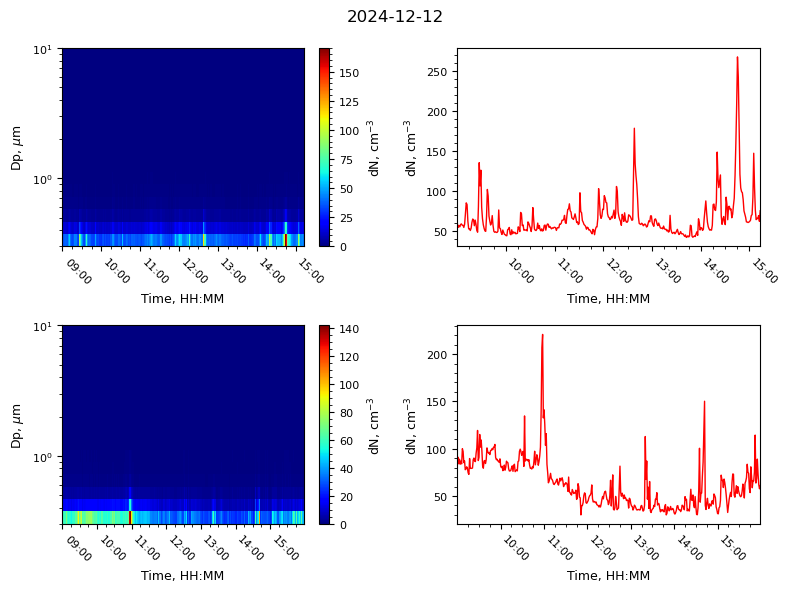

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


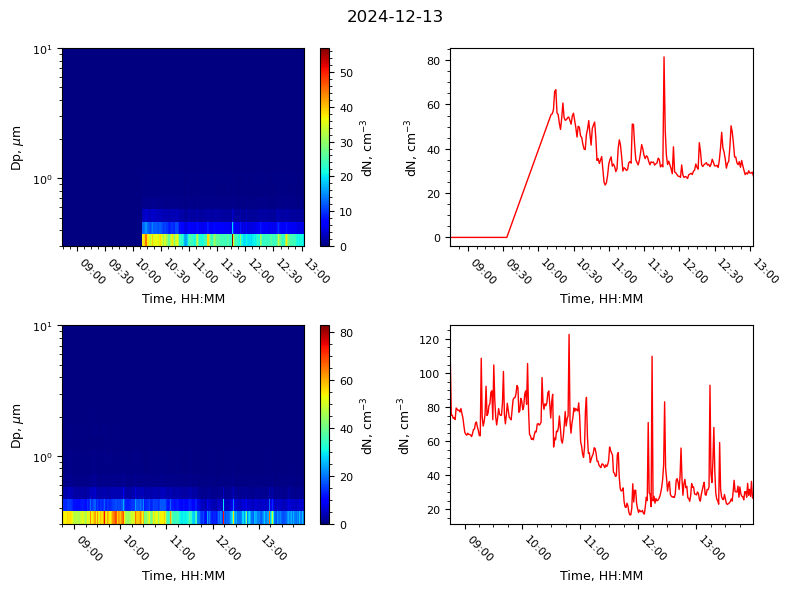

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


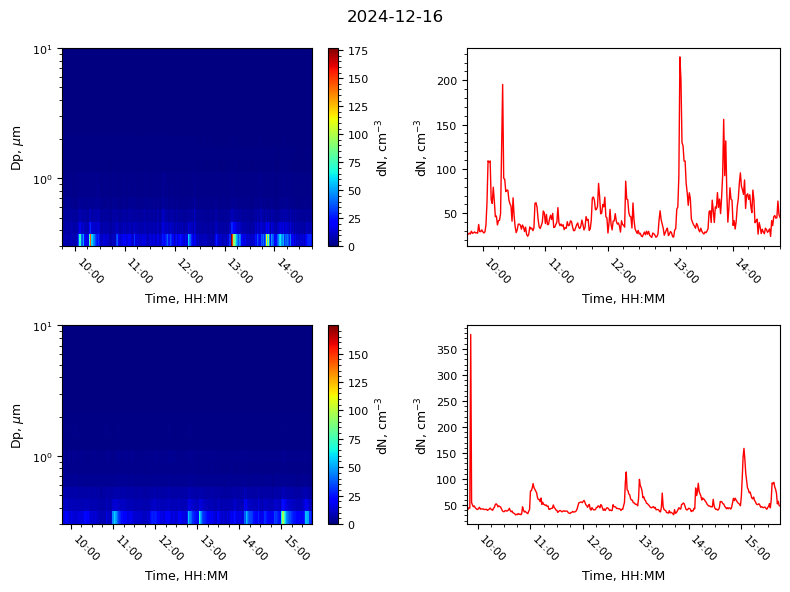

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


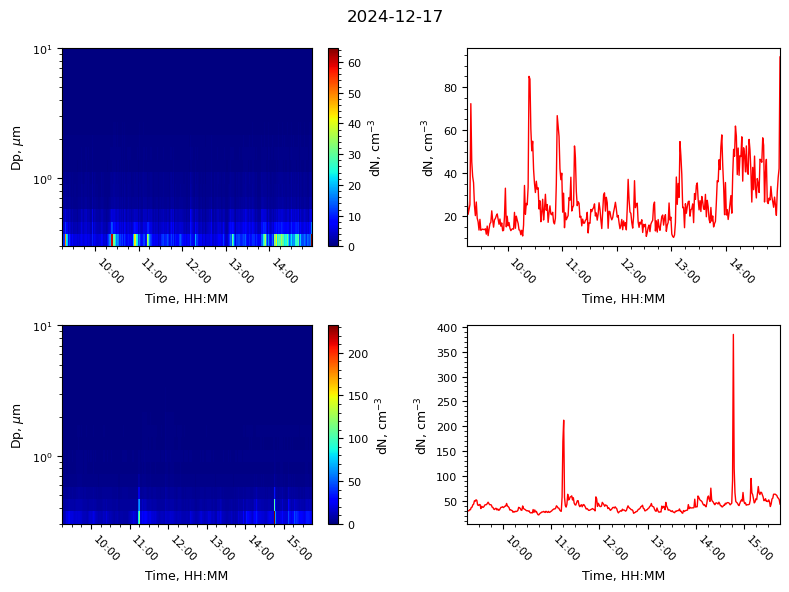

In [5]:
for i, key in enumerate(OPS1_dict_keys):
    date = timestamps_wBG[i][0].split(' ')[0]

    name = 'Timeseries/OPS_timeseries_' + date + '.png'

    fig, ax = plt.subplots(2, 2, figsize = (8, 6))

    plot_timeseries(fig, ax[0], OPS1[key], OPS_keys, OPS_cut_point, 'number', timestamps_wBG[i])
    plot_timeseries(fig, ax[1], OPS2[OPS2_dict_keys[i]], OPS_keys, OPS_cut_point, 'number', timestamps_wBG[i])

    fig.suptitle(date)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


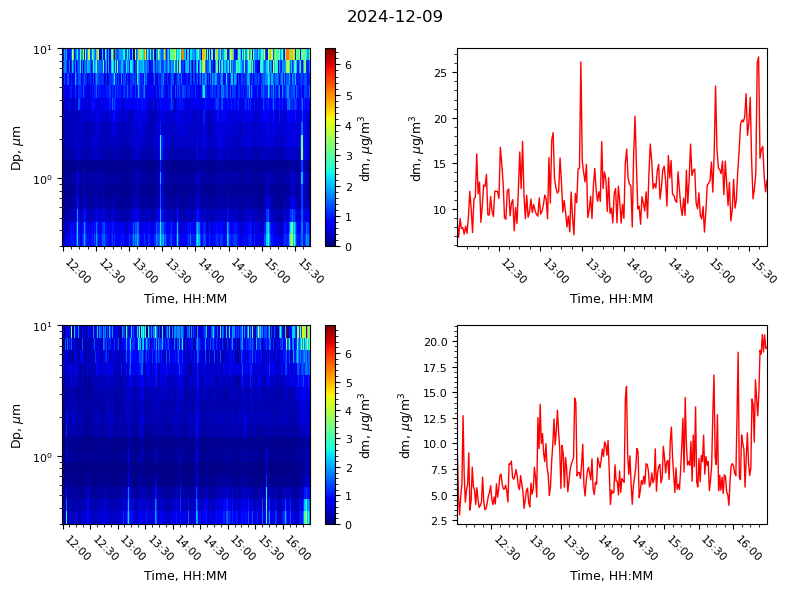

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


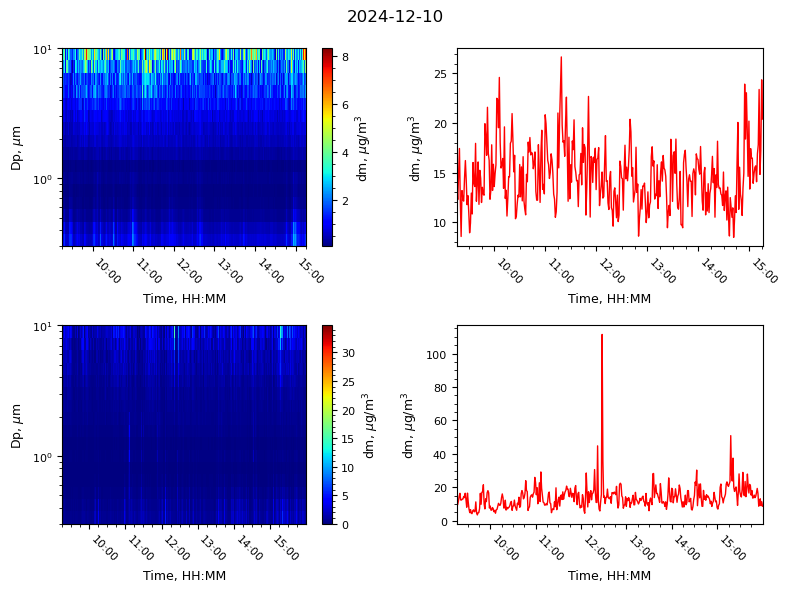

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


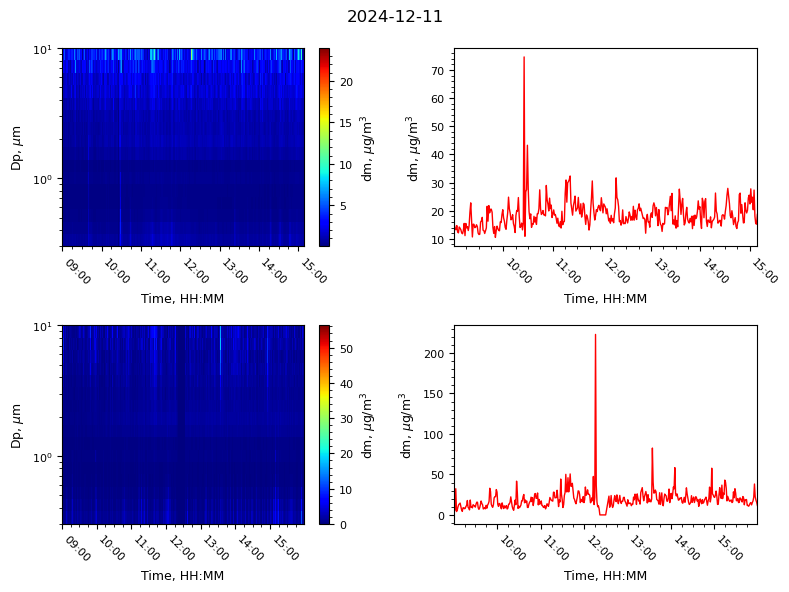

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


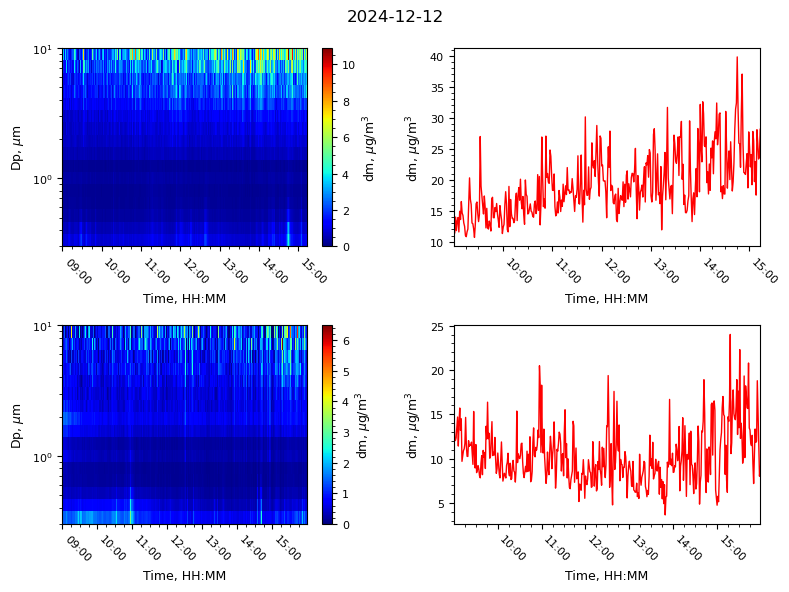

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


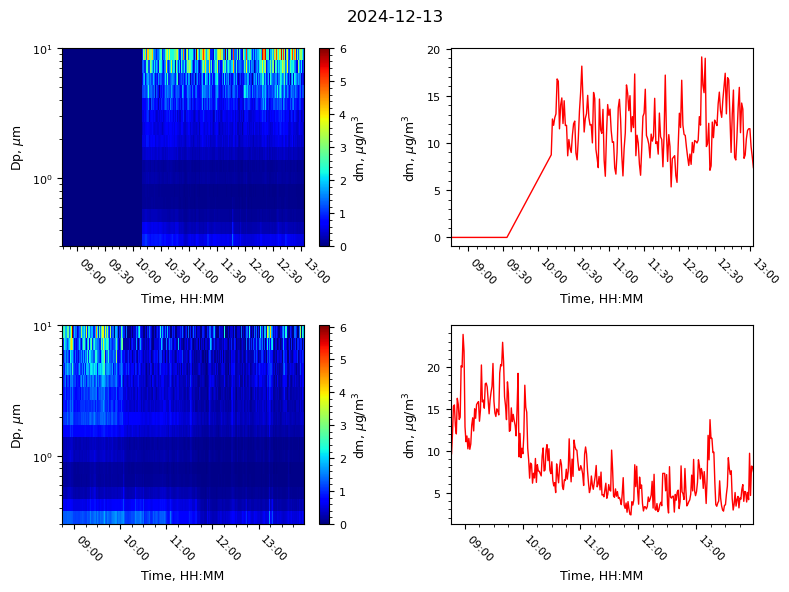

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


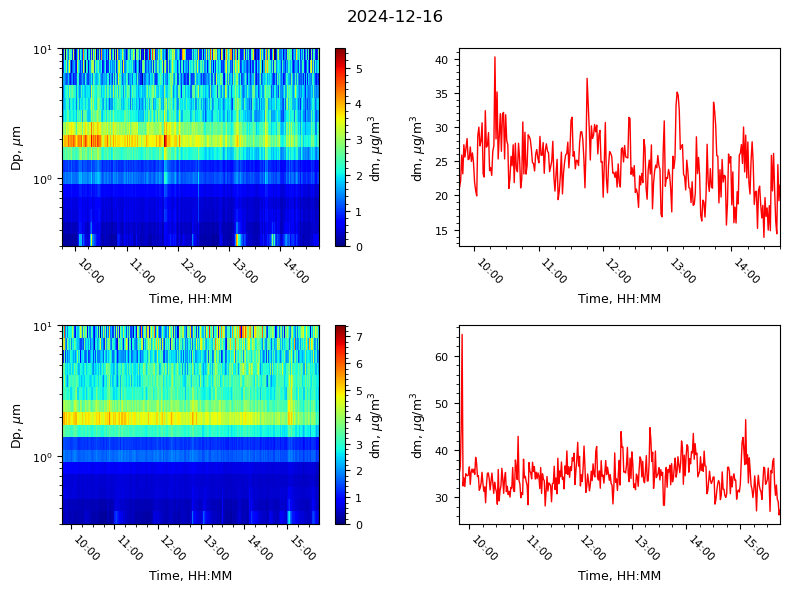

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


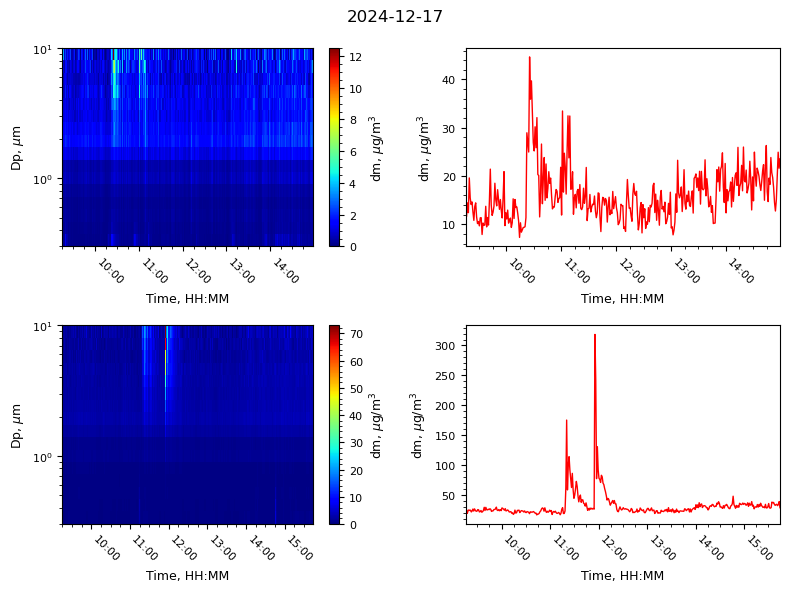

In [6]:
for i, key in enumerate(OPS1_dict_keys):
    date = timestamps_wBG[i][0].split(' ')[0]

    name = 'Timeseries/OPS_timeseries_mass_' + date + '.png'

    fig, ax = plt.subplots(2, 2, figsize = (8, 6))

    plot_timeseries(fig, ax[0], OPS1_mass[key], OPS_keys, OPS_cut_point, 'mass', timestamps_wBG[i])
    plot_timeseries(fig, ax[1], OPS2_mass[OPS2_dict_keys[i]], OPS_keys, OPS_cut_point, 'mass', timestamps_wBG[i])

    fig.suptitle(date)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


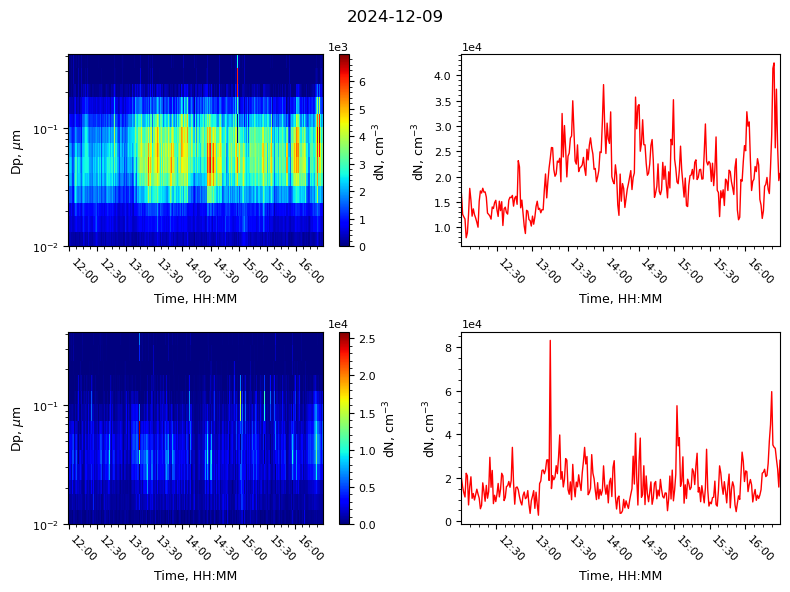

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


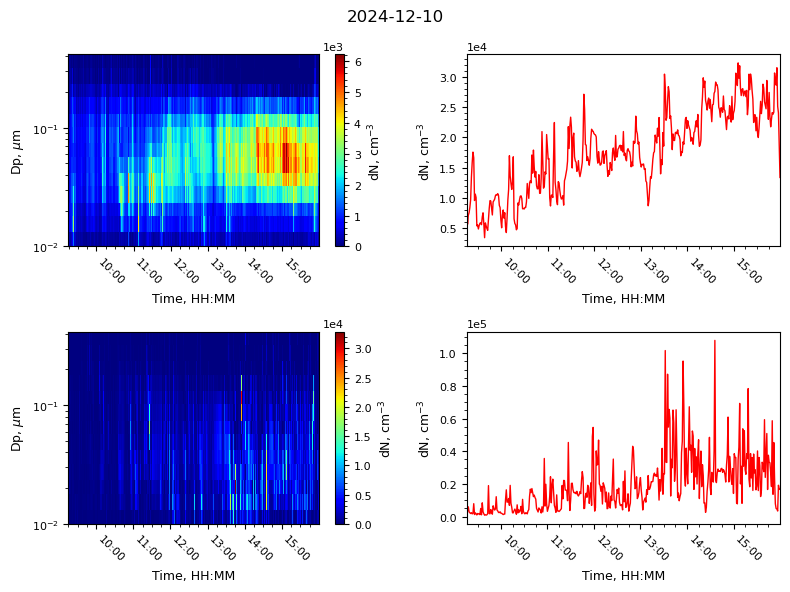

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


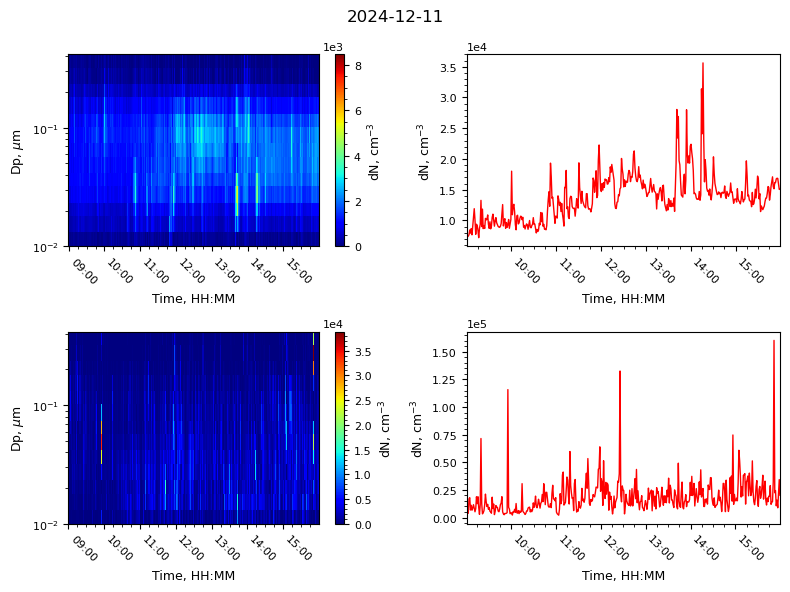

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


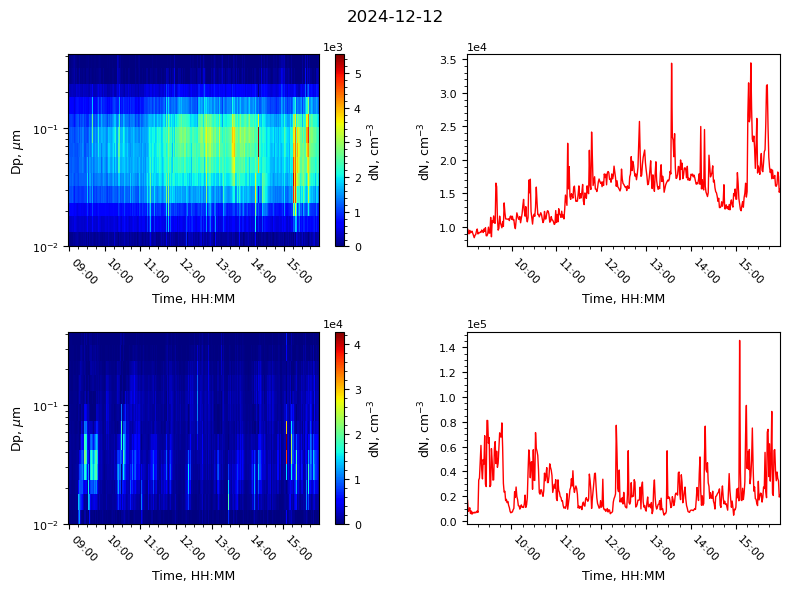

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


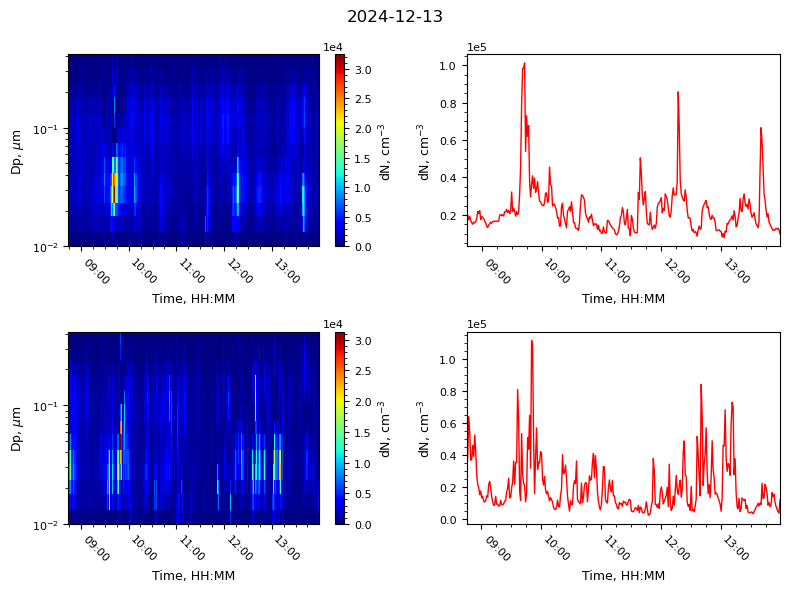

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


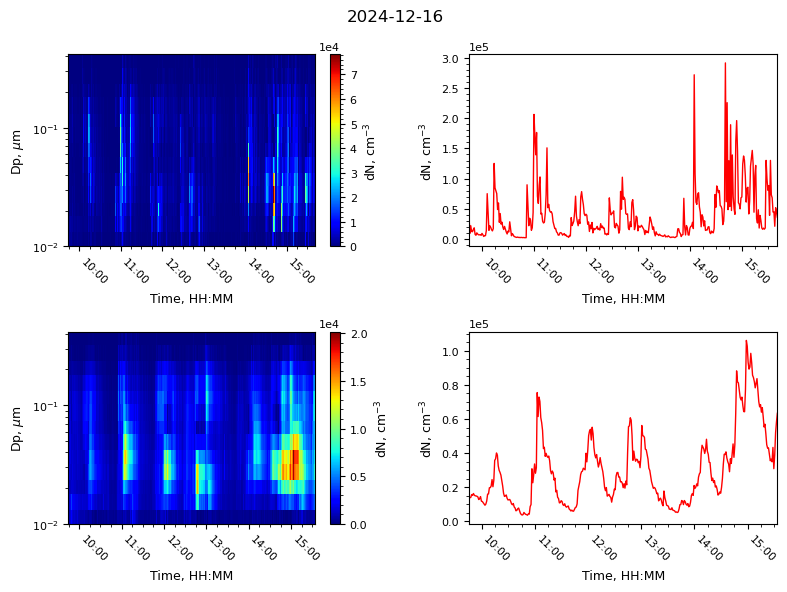

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


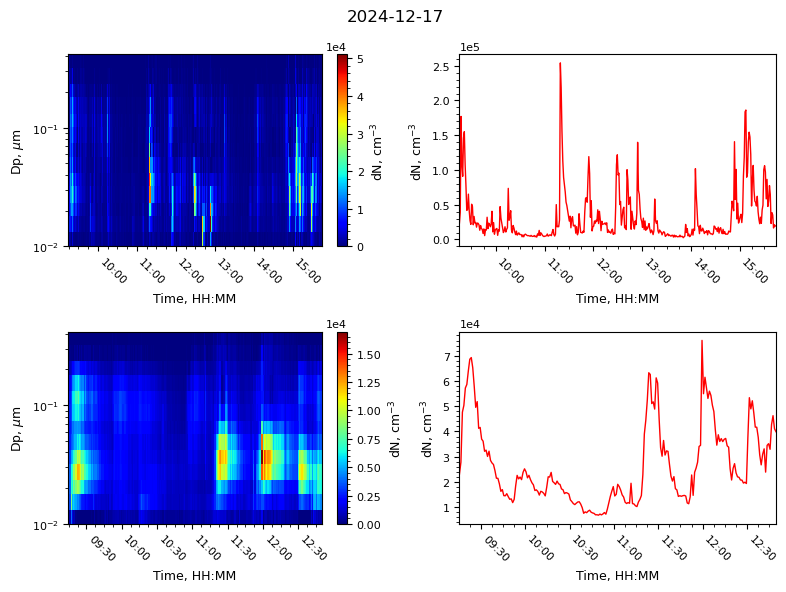

In [7]:
NS_bin_mean = []
for key in NS1['2024-12-16_NanoScan'].keys()[3:16]:
    NS_bin_mean.append(float(key) / 1000)
NS_cut_point = bin_edges(0.010, NS_bin_mean)

for i, key in enumerate(NS_dict_keys):
    date = timestamps_wBG[i][0].split(' ')[0]

    name = 'Timeseries/NS_timeseries_' + date + '.png'

    fig, ax = plt.subplots(2, 2, figsize = (8, 6))

    plot_timeseries(fig, ax[0], NS1[key], NS_bins, NS_cut_point, 'number', timestamps_wBG[i])
    plot_timeseries(fig, ax[1], NS2[key], NS_bins, NS_cut_point, 'number', timestamps_wBG[i])

    fig.suptitle(date)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\DSB_measurements\..\plot_functions.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha="left")
C:\Users\B363580\AppData\Local\Temp\ipykernel_3088\3295744675.py

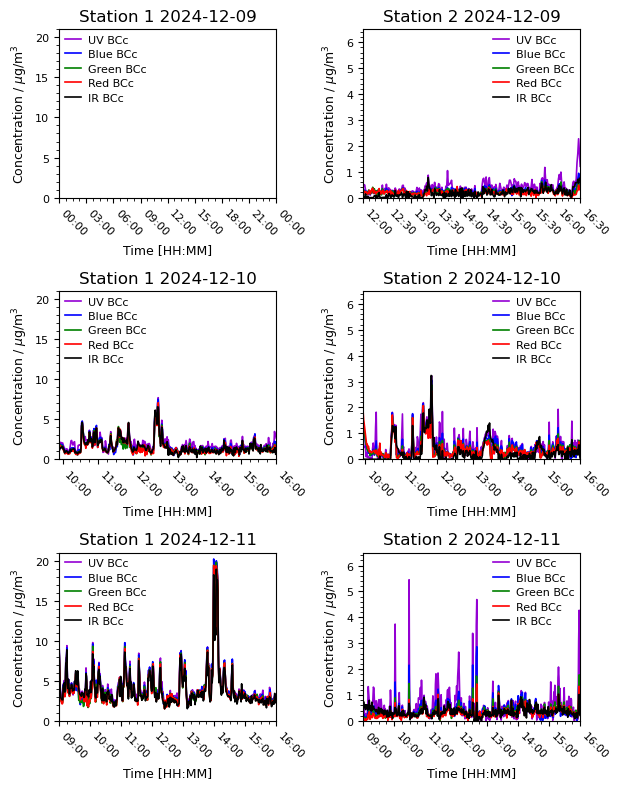

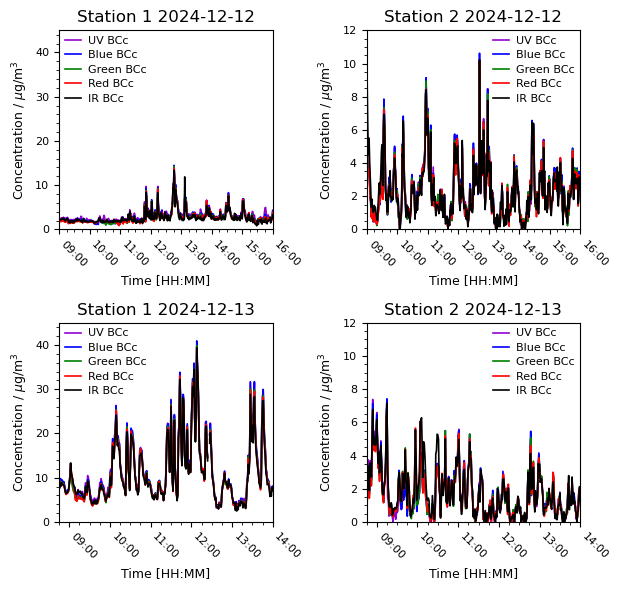

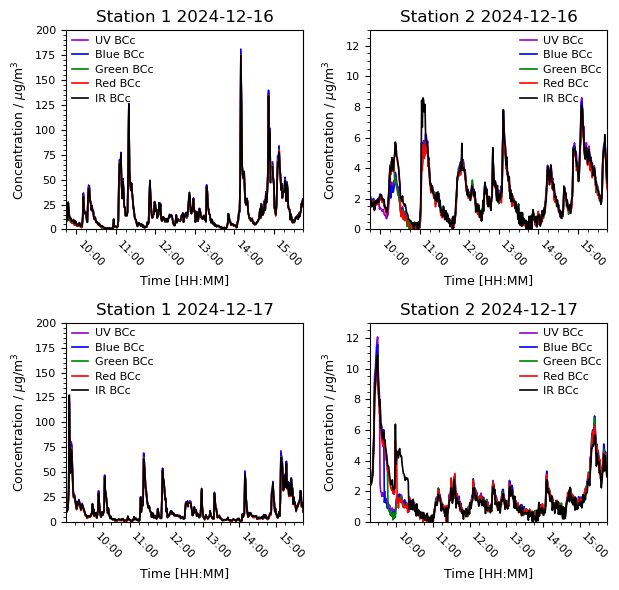

In [6]:
MA1_dict_keys = ['MA200-0369_000301200101', 'MA200-0369_241210105000', 'MA200-0369_241211095501', 'MA200-0369_241212094705', 
                 'MA200-0369_241213094000', 'MA200-0369_241216103300', 'MA200-0369_241217094901']
MA2_dict_keys = ['MA200-0285_241209120400', 'MA200-0285_241210105200', 'MA200-0285_241211093400', 'MA200-0285_241212093100', 
                 'MA200-0285_241213092900', 'MA200-0285_241216102104', 'MA200-0285_241217101400']

fig1, ax1 = plt.subplots(3, 2, figsize = (6.3, 8))
fig2, ax2 = plt.subplots(2, 2, figsize = (6.3, 6))
fig3, ax3 = plt.subplots(2, 2, figsize = (6.3, 6))

for i, key in enumerate(MA1_dict_keys):
    date = timestamps_wBG[i][0].split(' ')[0]

    if i < 3:
        ma_single_timeseries(ax1[i][0], MA1[key], False, timestamps_wBG[i], 2)
        ma_single_timeseries(ax1[i][1], MA2[MA2_dict_keys[i]], False, timestamps_wBG[i], 1)

        ax1[i][0].set_title('Station 1 ' + date)
        ax1[i][1].set_title('Station 2 ' + date)
        ax1[i][0].set_ylim(0, 21)
        ax1[i][1].set_ylim(0, 6.5)

        fig1.tight_layout()
        fig1.savefig('Timeseries/MA200_timeseries_CPH_hall.png', dpi = 600)

    if 2 < i < 5:
        ma_single_timeseries(ax2[i-3][0], MA1[key], False, timestamps_wBG[i], 2)
        ma_single_timeseries(ax2[i-3][1], MA2[MA2_dict_keys[i]], False, timestamps_wBG[i], 1)

        ax2[i-3][0].set_title('Station 1 ' + date)
        ax2[i-3][1].set_title('Station 2 ' + date)
        ax2[i-3][0].set_ylim(0, 45)
        ax2[i-3][1].set_ylim(0, 12)

        fig2.tight_layout()
        fig2.savefig('Timeseries/MA200_timeseries_CPH_platform.png', dpi = 600)

    if i > 4:
        ma_single_timeseries(ax3[i-5][0], MA1[key], False, timestamps_wBG[i], 2)
        ma_single_timeseries(ax3[i-5][1], MA2[MA2_dict_keys[i]], False, timestamps_wBG[i], 1)

        ax3[i-5][0].set_title('Station 1 ' + date)
        ax3[i-5][1].set_title('Station 2 ' + date)
        ax3[i-5][0].set_ylim(0, 200)
        ax3[i-5][1].set_ylim(0, 13)

        fig3.tight_layout()
        fig3.savefig('Timeseries/MA200_timeseries_NP.png', dpi = 600)